In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('./sudoku.png', 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

In [4]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

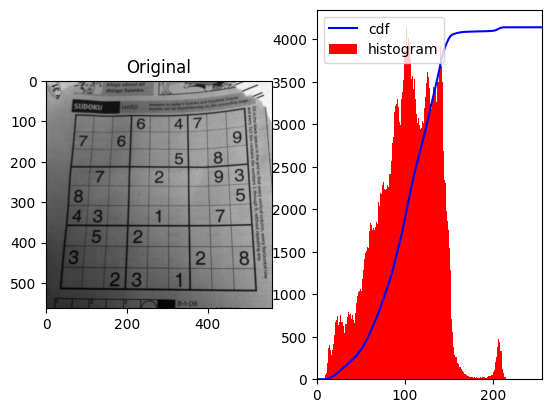

In [14]:
plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [7]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

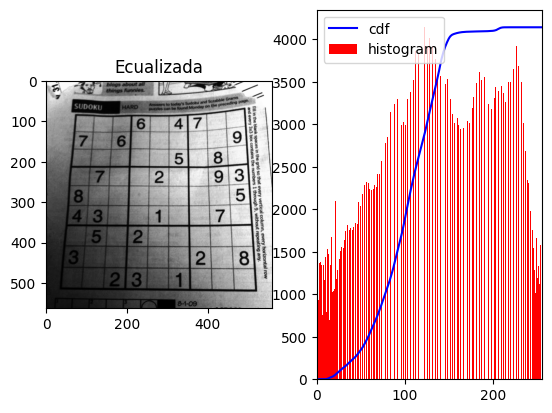

In [15]:
plt.subplot(121)
plt.imshow(img2, cmap='gray'), plt.title('Ecualizada')
plt.subplot(122)
plt.plot(cdf_normalized, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [12]:
img = cv2.imread('./sudoku.png', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
cv2.imshow('Ecualizada', res)
cv2.waitKey(0)  

-1